In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Sampling frequency
fs = 1500  # Hz
nyq = 0.5 * fs

def rectify(data):
    rec = abs(data)
    return rec

def lowpass_filter(data, cutoff_l, fs, order):
    lp_cutoff = cutoff_l/nyq
    n, d = butter(order, lp_cutoff, btype='low', analog=False)
    filtered = filtfilt(n, d, data)
    return filtered


# biceps brachii

In [2]:
BB = pd.read_csv(r"data\BB.csv")
BB = BB.values[:, 0]
time = np.arange(len(BB)) / fs
BB_rec = rectify(BB)
BB_lpf = lowpass_filter(BB_rec, 2, fs, order=4)

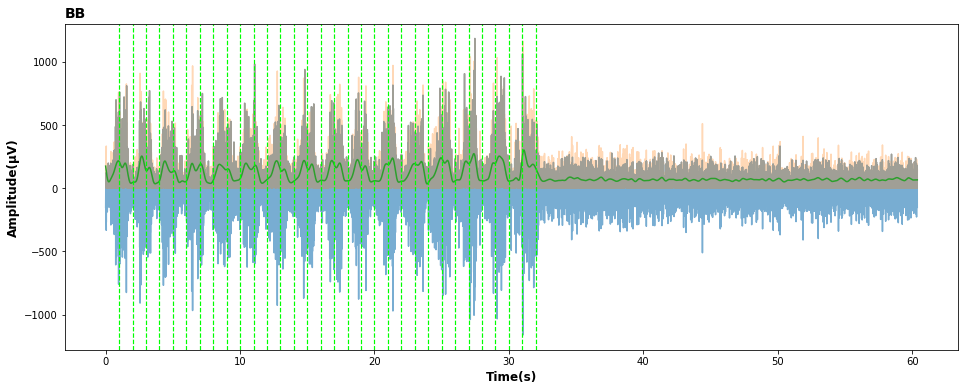

In [3]:
plt.figure(figsize=(16, 6))
plt.title('BB', fontsize=14, fontweight='bold', loc='left')
plt.plot(time,BB,alpha=0.6)
plt.plot(time,BB_rec,alpha=0.3)
plt.plot(time,BB_lpf)
plt.ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
plt.xlabel('Time(s)', fontsize=12, fontweight='bold')
for x in range(1, 33):
    plt.axvline(x=x, color="#00ff00", linewidth=1.2, linestyle="--")


Range 1: Lowest position at (x, y) = (354.0, 50.40123246076729)
Range 2: Lowest position at (x, y) = (2827.0, 39.24701147750422)
Range 3: Lowest position at (x, y) = (5529.0, 34.99295116285213)
Range 4: Lowest position at (x, y) = (8240.0, 45.15140140350008)
Range 5: Lowest position at (x, y) = (11676.0, 37.61199419669099)
Range 6: Lowest position at (x, y) = (14362.000000000002, 57.56929990741706)
Range 7: Lowest position at (x, y) = (17473.0, 39.34757658836123)
Range 8: Lowest position at (x, y) = (20692.0, 43.30265468421075)
Range 9: Lowest position at (x, y) = (23665.0, 48.18924971842154)
Range 10: Lowest position at (x, y) = (26787.0, 57.30272336088374)
Range 11: Lowest position at (x, y) = (29630.0, 49.699557030737644)
Range 12: Lowest position at (x, y) = (32716.0, 47.45714705984099)
Range 13: Lowest position at (x, y) = (35879.0, 34.01187479586722)
Range 14: Lowest position at (x, y) = (38821.0, 48.87665115162251)
Range 15: Lowest position at (x, y) = (42169.0, 57.2417127253712

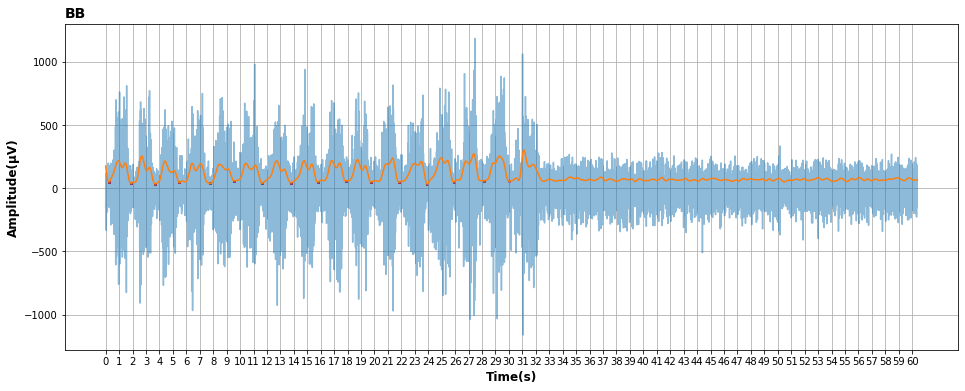

In [4]:
plt.figure(figsize=(16, 6))
plt.plot(time, BB, alpha=0.5)
plt.plot(time, BB_lpf)
plt.grid(True)
plt.title('BB', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
plt.xlabel('Time(s)', fontsize=12, fontweight='bold')
plt.xticks(range(int(min(time)), int(max(time)) + 1, 1))
lowest_positions = []
ranges = [(0, 1), (1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17.7, 17.9), (19, 20), (21, 22),
                  (23, 24), (25, 26), (28, 29), (29, 30)]
for range_idx, (start, end) in enumerate(ranges):
    indices = np.where((time > start) & (time < end))[0]
    if indices.size > 0:
        dt_range = BB_lpf[indices]
        lowest_index = np.argmin(dt_range)
        lowest_time = time[indices][lowest_index]
        lowest_value = dt_range[lowest_index]
        lowest_positions.append((range_idx, lowest_time, lowest_value))        
        
        # Initialize an empty list to store the computed values
        lowest_time_fs = []
        
        for range_idx, lowest_time, lowest_value in lowest_positions:
            plt.scatter(lowest_time, lowest_value, color='red', s=4)
            
            ltf = round(lowest_time * fs, 0)
            lowest_time_fs.append(ltf)
            
        # Create a DataFrame with the data
        BB_onset = pd.DataFrame({'BB': lowest_time_fs})
            
        # Save the DataFrame to an Excel file
        BB_onset.to_excel(r"BB_onset.xlsx", index=False)   
        
# Print the lowest positions
for range_idx, lowest_time, lowest_value in lowest_positions:
    print(f"Range {range_idx + 1}: Lowest position at (x, y) = ({lowest_time*fs}, {lowest_value})")
            
plt.show()

# anterior deltoid

In [5]:
AD = pd.read_csv(r"data\AD.csv")
AD = AD.values[:, 0]
time = np.arange(len(AD)) / fs
AD_rec = rectify(AD)
AD_lpf = lowpass_filter(AD_rec, 2, fs, order=4)

Text(0.5, 0, 'Time(s)')

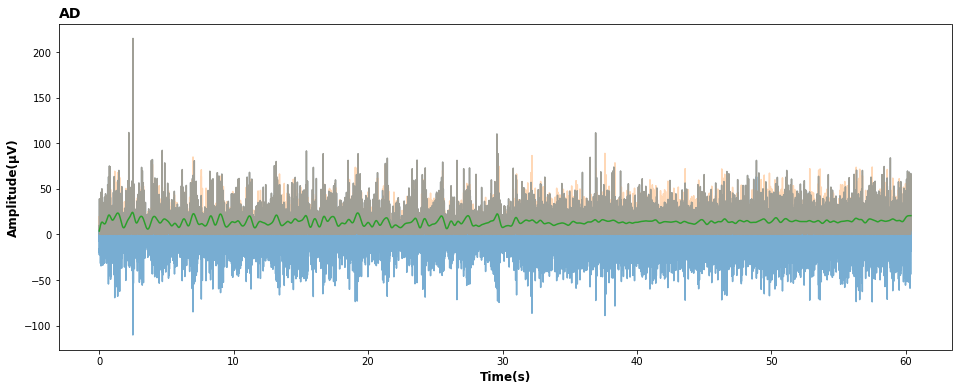

In [6]:
plt.figure(figsize=(16, 6))
plt.title('AD', fontsize=14, fontweight='bold', loc='left')
plt.plot(time,AD,alpha=0.6)
plt.plot(time,AD_rec,alpha=0.3)
plt.plot(time,AD_lpf)
plt.ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
plt.xlabel('Time(s)', fontsize=12, fontweight='bold')

Range 1: Lowest position at (x, y) = (1.0, 3.797039207988896)
Range 2: Lowest position at (x, y) = (2725.0, 7.2949302004797385)
Range 3: Lowest position at (x, y) = (5410.0, 5.825756637280251)
Range 4: Lowest position at (x, y) = (8874.0, 7.640584471892726)
Range 5: Lowest position at (x, y) = (11815.0, 9.230352266448254)
Range 6: Lowest position at (x, y) = (14198.0, 8.117199002148617)
Range 7: Lowest position at (x, y) = (17365.0, 7.236553821317638)
Range 8: Lowest position at (x, y) = (20386.0, 9.632075329113382)
Range 9: Lowest position at (x, y) = (23567.0, 7.83610631385961)
Range 10: Lowest position at (x, y) = (26692.999999999996, 9.000724266592238)
Range 11: Lowest position at (x, y) = (29548.999999999996, 8.931064908139115)
Range 12: Lowest position at (x, y) = (32655.0, 7.376959923580441)
Range 13: Lowest position at (x, y) = (35796.0, 7.245711708998601)
Range 14: Lowest position at (x, y) = (38782.0, 6.287075376728896)
Range 15: Lowest position at (x, y) = (41758.0, 9.235203

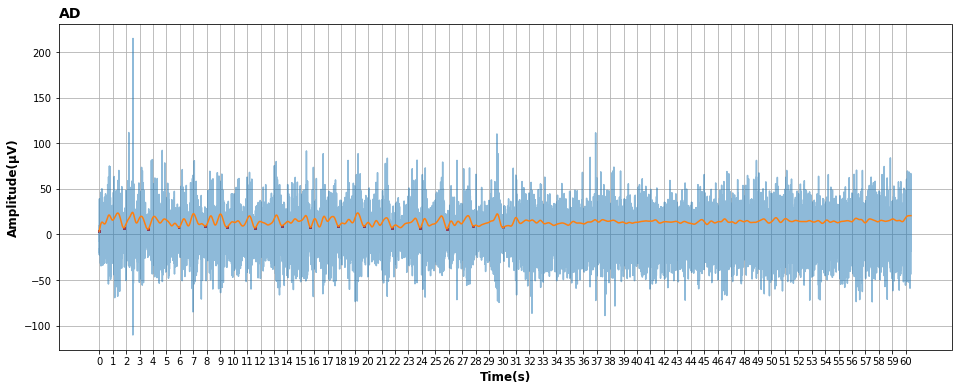

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(time, AD, alpha=0.5)
plt.plot(time, AD_lpf)
plt.grid(True)
plt.title('AD', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
plt.xlabel('Time(s)', fontsize=12, fontweight='bold')
plt.xticks(range(int(min(time)), int(max(time)) + 1, 1))
lowest_positions = []
ranges = [(0, 1), (1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17, 18), (19, 20), (21, 22),
                  (23, 24), (25, 26), (27, 28), (29, 30)]

for range_idx, (start, end) in enumerate(ranges):
    indices = np.where((time > start) & (time < end))[0]
    if indices.size > 0:
        dt_range = AD_lpf[indices]
        lowest_index = np.argmin(dt_range)
        lowest_time = time[indices][lowest_index]
        lowest_value = dt_range[lowest_index]
        lowest_positions.append((range_idx, lowest_time, lowest_value))    
        
        # Initialize an empty list to store the computed values
        lowest_time_fs = []
        
        for range_idx, lowest_time, lowest_value in lowest_positions:
            plt.scatter(lowest_time, lowest_value, color='red', s=4)
            
            ltf = round(lowest_time * fs, 0)
            lowest_time_fs.append(ltf)
            
        # Create a DataFrame with the data
        AD_onset = pd.DataFrame({'AD': lowest_time_fs})
            
        # Save the DataFrame to an Excel file
        AD_onset.to_excel(r"AD_onset.xlsx", index=False)            

# Print the lowest positions
for range_idx, lowest_time, lowest_value in lowest_positions:
    print(f"Range {range_idx + 1}: Lowest position at (x, y) = ({lowest_time*fs}, {lowest_value})")


plt.show()


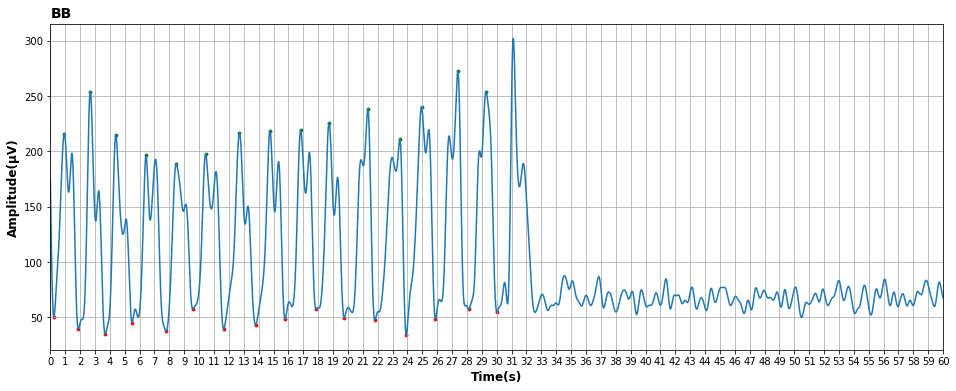

In [8]:
plt.figure(figsize=(16, 6))
plt.plot(time, BB_lpf)
plt.grid(True)
plt.xlim(0, 33)
plt.title('BB', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
plt.xlabel('Time(s)', fontsize=12, fontweight='bold')
plt.xticks(range(int(min(time)), int(max(time)) + 1, 1))
lowest_positions = []
ranges = [(0, 1), (1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17.7, 17.9), (19, 20), (21, 22),
          (23, 24), (25, 26), (28, 29), (29, 30)]

for range_idx, (start, end) in enumerate(ranges):
    indices = np.where((time > start) & (time < end))[0]
    if indices.size > 0:
        dt_range = BB_lpf[indices]
        lowest_index = np.argmin(dt_range)
        lowest_time = time[indices][lowest_index]
        lowest_value = dt_range[lowest_index]
        lowest_positions.append((range_idx, lowest_time, lowest_value))
        
        # Find the highest point between two lowest points
        if len(lowest_positions) >= 2:
            prev_lowest_time = lowest_positions[-2][1]
            prev_lowest_index = np.where(time == prev_lowest_time)[0][0]
            current_lowest_time = lowest_time
            current_lowest_index = np.where(time == current_lowest_time)[0][0]
            
            highest_index = np.argmax(BB_lpf[prev_lowest_index:current_lowest_index]) + prev_lowest_index
            highest_time = time[highest_index]
            highest_value = BB_lpf[highest_index]
            
            plt.scatter(highest_time, highest_value, color='green', s=8)

# Initialize an empty list to store the computed values
lowest_time_fs = []

# Convert the lowest time to samples (for each range)
for range_idx, lowest_time, lowest_value in lowest_positions:
    plt.scatter(lowest_time, lowest_value, color='red', s=8)
            
    ltf = round(lowest_time * fs, 0)
    lowest_time_fs.append(ltf)
            
# Create a DataFrame with the data
BB_onset = pd.DataFrame({'BB': lowest_time_fs})
            
# Save the DataFrame to an Excel file
BB_onset.to_excel(r"BB_onset.xlsx", index=False)   

            
plt.show()


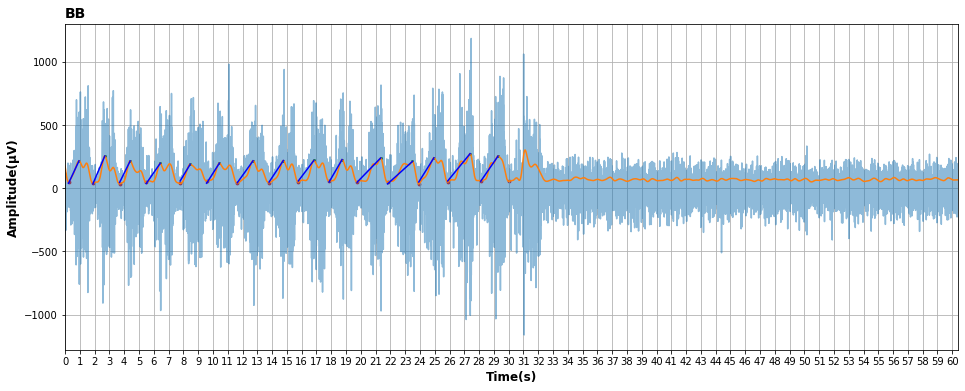

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(time, BB, alpha=0.5)
plt.plot(time, BB_lpf)
plt.grid(True)
plt.title('BB', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
plt.xlabel('Time(s)', fontsize=12, fontweight='bold')

# Set the range of the x-axis
plt.xlim(min(time), max(time))

plt.xticks(range(int(min(time)), int(max(time)) + 1, 1))
lowest_positions = []
ranges = [(0, 1), (1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17.7, 17.9), (19, 20), (21, 22),
          (23, 24), (25, 26), (28, 29), (29, 30)]

for range_idx, (start, end) in enumerate(ranges):
    indices = np.where((time > start) & (time < end))[0]
    if indices.size > 0:
        dt_range = BB_lpf[indices]
        lowest_index = np.argmin(dt_range)
        lowest_time = time[indices][lowest_index]
        lowest_value = dt_range[lowest_index]
        lowest_positions.append((range_idx, lowest_time, lowest_value))
        
        # Find the highest point between two lowest points
        if len(lowest_positions) >= 2:
            prev_lowest_time = lowest_positions[-2][1]
            prev_lowest_index = np.where(time == prev_lowest_time)[0][0]
            current_lowest_time = lowest_time
            current_lowest_index = np.where(time == current_lowest_time)[0][0]
            
            highest_index = np.argmax(BB_lpf[prev_lowest_index:current_lowest_index]) + prev_lowest_index
            highest_time = time[highest_index]
            highest_value = BB_lpf[highest_index]
            
            plt.scatter(highest_time, highest_value, color='green', s=4)
            
            
            # Plot the line connecting the lowest and highest points
            plt.plot([prev_lowest_time, highest_time], [lowest_value, highest_value], color='blue')
            
            
# Convert the lowest time to samples (for each range)
for range_idx, lowest_time, lowest_value in lowest_positions:
    plt.scatter(lowest_time, lowest_value, color='red', s=8)


plt.show()
